# Police Dataset - EDA
This data is from a Police Check Post

* Q. 1) Instruction ( For Data Cleaning ) - Remove the column that only contains missing values.
* Q. 2) Question ( Based on Filtering + Value Counts ) - For Speeding , were Men or Women stopped more often ? 
* Q. 3) Question ( Groupby ) - Does gender affect who gets searched during a stop ?
* Q. 4) Question ( mapping + data-type casting ) - What is the mean stop_duration ?
* Q. 5) Question ( Groupby , Describe ) - Compare the age distributions for each violation.

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing Dataset

data = pd.read_csv("police_data.csv")

In [3]:
data.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [4]:
data.shape

(65535, 15)

## Data Cleaning

1- Remove the colums that only contains missing values.

In [5]:
# Checking for Null/MV

data.isnull().sum()

stop_date                 0
stop_time                 0
country_name          65535
driver_gender          4061
driver_age_raw         4054
driver_age             4307
driver_race            4060
violation_raw          4060
violation              4060
search_conducted          0
search_type           63056
stop_outcome           4060
is_arrested            4060
stop_duration          4060
drugs_related_stop        0
dtype: int64

The column country_name has missing values 65535

In [6]:
data.drop(columns= 'country_name', inplace= True)

2- For Speeding, were Men or Women stopped more often?

In [7]:
data.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [8]:
data["violation_raw"].value_counts()

Speeding                            37204
Other Traffic Violation             11926
Equipment/Inspection Violation       6516
Special Detail/Directed Patrol       2383
Registration Violation               2243
Call for Service                      793
Violation of City/Town Ordinance      170
Motorist Assist/Courtesy              138
APB                                    51
Suspicious Person                      38
Warrant                                10
Seatbelt Violation                      3
Name: violation_raw, dtype: int64

In [9]:
data[data.violation_raw == 'Speeding'].driver_gender.value_counts()

M    25517
F    11686
Name: driver_gender, dtype: int64

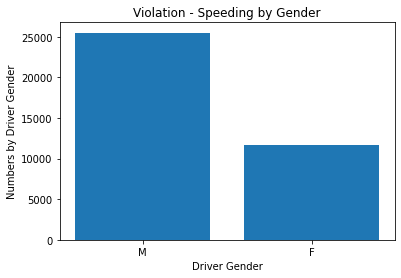

In [10]:
speeding = data[data.violation_raw == 'Speeding'].driver_gender.value_counts()

plt.bar(speeding.index, speeding.values)
plt.title("Violation - Speeding by Gender")
plt.xlabel("Driver Gender")
plt.ylabel("Numbers by Driver Gender")
plt.show()

Checking For "Other Traffic Violation"

In [11]:
data[data.violation_raw == "Other Traffic Violation"].driver_gender.value_counts()

M    9784
F    2142
Name: driver_gender, dtype: int64

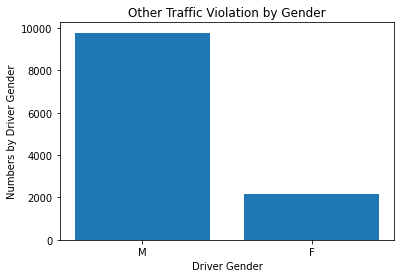

In [12]:
other_traffic_violations = data[data.violation_raw == 'Other Traffic Violation'].driver_gender.value_counts()

plt.bar(other_traffic_violations.index, other_traffic_violations.values)
plt.title("Other Traffic Violation by Gender")
plt.xlabel("Driver Gender")
plt.ylabel("Numbers by Driver Gender")
plt.show()

In [13]:
data['driver_gender'].value_counts()

M    45164
F    16310
Name: driver_gender, dtype: int64

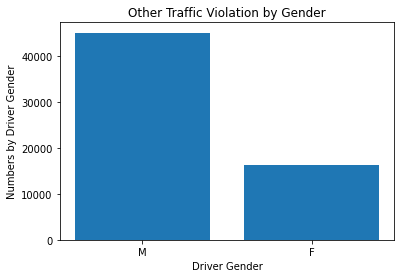

In [14]:
drivers_gender = data['driver_gender'].value_counts()

plt.bar(drivers_gender.index, drivers_gender.values)
plt.title("Other Traffic Violation by Gender")
plt.xlabel("Driver Gender")
plt.ylabel("Numbers by Driver Gender")
plt.show()

3- Who gets searched during a stop? Does gender affects?

In [15]:
# Total number of Search Conducted By Gender 

data.groupby('driver_gender').search_conducted.value_counts()

driver_gender  search_conducted
F              False               15944
               True                  366
M              False               43051
               True                 2113
Name: search_conducted, dtype: int64

In [16]:
# Search Conducted by Gender Men and Women

data.groupby('driver_gender').search_conducted.sum()

driver_gender
F     366
M    2113
Name: search_conducted, dtype: int64

In [17]:
# Total Number of Time Search Conducted

data.search_conducted.value_counts()

False    63056
True      2479
Name: search_conducted, dtype: int64

4- What is the mean stop_duration?

In [18]:
data['stop_duration'].value_counts()

0-15 Min     47379
16-30 Min    11448
30+ Min       2647
2                1
Name: stop_duration, dtype: int64

In [19]:
data.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


Changing the value of stop_duration from 0-15 min with an mean values

In [20]:
data['stop_duration'] = data['stop_duration'].map({'0-15 Min' : 7.5, '16-30 Min' : 24, '30+ Min' : 45, '2' : 2}) # mapping means changing the values old:new

In [21]:
data['stop_duration']

0         7.5
1         7.5
2         7.5
3        24.0
4         7.5
         ... 
65530     7.5
65531     7.5
65532     7.5
65533     NaN
65534     7.5
Name: stop_duration, Length: 65535, dtype: float64

This columns has a null value

In [23]:
data['stop_duration'].isnull().value_counts()

False    61475
True      4060
Name: stop_duration, dtype: int64

Filling the Null with Mean

In [24]:
data['stop_duration'] = data['stop_duration'].fillna(data['stop_duration'].mean())

In [25]:
data['stop_duration'].isnull().value_counts()

False    65535
Name: stop_duration, dtype: int64

Solving the question Mean Stop_Duration

In [26]:
data['stop_duration'].mean()

12.187254981700699

5- Compare the age distribution for each violation

In [28]:
data['driver_age'].value_counts()

22.0    2912
21.0    2886
20.0    2783
23.0    2725
24.0    2583
        ... 
15.0       5
84.0       3
88.0       2
83.0       2
85.0       1
Name: driver_age, Length: 73, dtype: int64

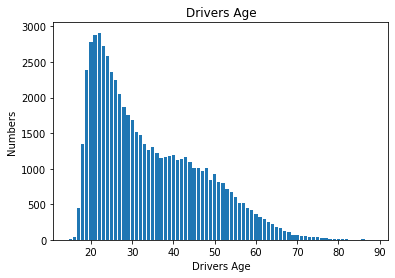

In [31]:
driver_age = data['driver_age'].value_counts()

plt.bar(driver_age.index, driver_age.values)
plt.title("Drivers Age")
plt.xlabel("Drivers Age")
plt.ylabel("Numbers")
plt.show()

In [32]:
data.groupby('violation').driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,6507.0,31.682957,11.380671,16.0,23.0,28.0,39.0,81.0
Moving violation,11876.0,36.736443,13.258350,15.0,25.0,35.0,47.0,86.0
Other,3477.0,40.362381,12.754423,16.0,30.0,41.0,50.0,86.0
Registration/plates,2240.0,32.656696,11.150780,16.0,24.0,30.0,40.0,74.0
Seat belt,3.0,30.333333,10.214369,23.0,24.5,26.0,34.0,42.0
Speeding,37120.0,33.262581,12.615781,15.0,23.0,30.0,42.0,88.0


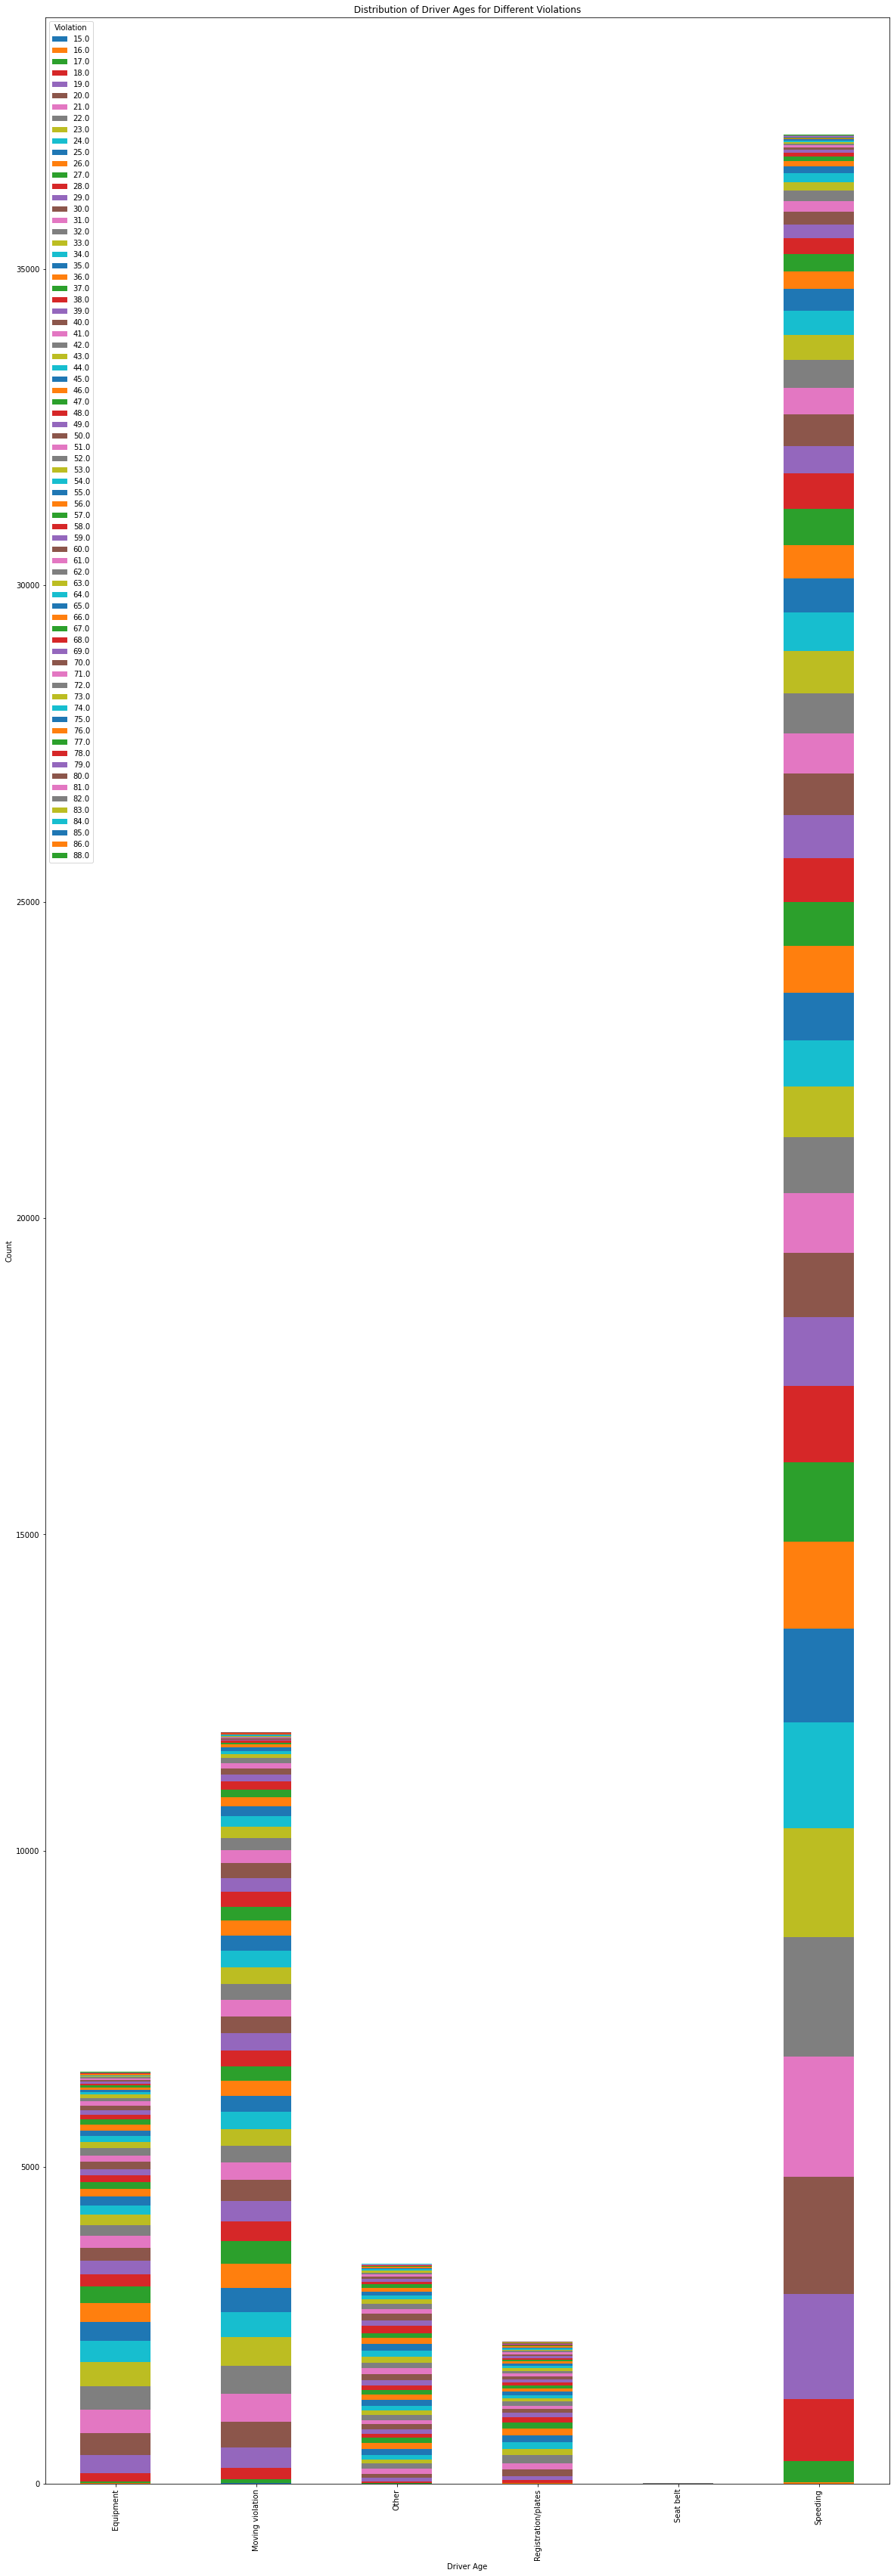

In [37]:
voilation_age = data.groupby('violation')['driver_age'].value_counts().unstack(fill_value=0)

voilation_age.plot(kind='bar', stacked=True, figsize=(20, 60))
plt.xlabel('Driver Age')
plt.ylabel('Count')
plt.title('Distribution of Driver Ages for Different Violations')
plt.legend(title='Violation')
plt.show()

Initially, the analysis indicated that men were more responsible for traffic violations. However, upon further examination of the dataset regarding driver gender, it has become evident that the data for men is much larger in scale compared to that for women. This disparity in data has introduced bias into the results. Another possible scenario could be that a majority of drivers are men, which would explain the higher number of male records compared to female records.